# Project Final Submission 

### Step 1a: Planning 
#### Identify the information in the file your program will read

+ Year(1 column):
The year from 1995 to 2010

+ State(1 column):
Includes states, DC, territories in the US, Nationwide (States and DC), and Nationwide (States, DC, and Territories).

+ smoking condition(4 columns):
There are 4 types of smoking conditions: Smoke everyday, Smoke some days, Former smoker, Never smoked. Each precents the percentage in range [0,1] of a certain area in a given year (e.g. 0.2 means in 1995, 20% of people in Arizona smoked everyday)

+ Location 1(1 colomn):
Shows the location, including the name of state/DC/territory and its coordinates on the map. The location 1 is empty for Nationwide (States and DC) and Nationwide (States, DC, and Territories).


### Step 1b: Planning 
#### Write a description of what your program will produce

This project is going to do the first one:produces a line chart showing the trend of percentage of current smokers(including the people who smoke everyday and smoke some days) in the US as year increases.

+ produces a line chart showing the trend of percentage of current smokers(including the people who smoke everyday and smoke some days) in the US as year increases.
+ takes a year and produces the state/DC/territory(excluding Nationwide (States and DC) and Nationwide (States, DC, and Territories)) with the highest current smoker(including the people who smoke everyday and smoke some days) rate in the given year.
+ produces a bar chart showing the percentage of people who have ever smoked (including smoke everyday, smoke some days, and former smoker) for each state/DC/territory(excluding Nationwide (States and DC) and Nationwide (States, DC, and Territories)) in 2010.

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the end of the Edit menu.

```python
current_smoker_trend('tobacco.csv')
```
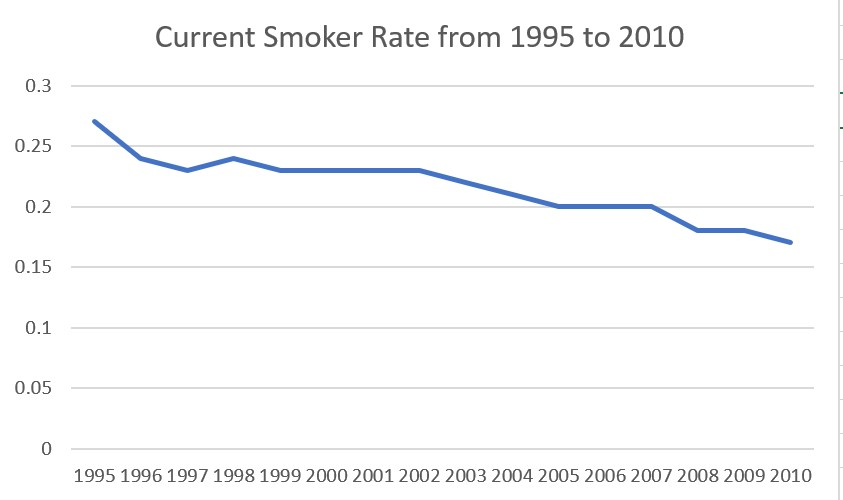

### Step 2a: Building
#### Design data definitions

The program will represent the year (in row 0 as an interger), the state (in row 1 as a string), the percentage of people who smoke everyday (in row 2 as a float), and the percentage of people who smoke some day (in row 3 as a float). Year is for producing a graph with respect to the increasing year, State is for filtering out Nationwide (States and DC) and Nationwide (States, DC, and Territories) data and to calculate the average percentage of the US, the percentage of people smoke every day and somedays is to calculate the sum as current smoker rate.

In [6]:
from cs103 import *
from typing import NamedTuple, List
import csv

##################
# Data Definitions

SmokeData = NamedTuple('SmokeData',[('year',int),# in range [1995,2010]
                                   ('state',str),
                                   ('percent_everyday',float),# in range [0,1]
                                   ('percent_some_days',float)])# in range [0,1]                                 

#interp.SmokeData has a year, a state(can be a state/DC/territory in the US), a percentage
#in the interval [0,1] of people who smoke everyday and a percentag in the interval 
#[0,1] of people who smoke some days

SD1=SmokeData(1995,'Alabama',0.22,0.2)
SD2=SmokeData(2002,'Tennessee',0.23,0.05)

@typecheck
#template based on compound
def fn_for_smoke_data(sd:SmokeData)->...:
    return ...(sd.year,
              sd.state,
              sd.percent_everyday,
              sd.percent_some_days)

# List[SmokeData]
# interp. a list of SmokeData

LOSD0=[]
LOSD1=[SD1]
LOSD2=[SD1,SD2]
LOSD3=[SmokeData(1995,'Alabama',0.22,0.2),
       SmokeData(2002,'Tennessee',0.23,0.05),
       SmokeData(1995,'Georgia',0.18,0.02)]
@typecheck
#template based on arbitrary-sized and reference rule
def fn_for_losd(losd: List[SmokeData]) -> ...:
    #description for accumulator
    acc=... #type:...
    for sd in losd:
        acc=...(acc,fn_for_smoke_data(sd))
    return ...(acc)


CurrentSmokerData=NamedTuple('CurrentSmokerData',[('year',int), #in range[1995,2010]
                                                 ('curr_smoker',float)]) #in range[0,1]
#interp.a current smoker data includes the year and the current smoker rate
C1=CurrentSmokerData(2001,0.3)
C2=CurrentSmokerData(1998,0.45)
@typecheck
#template based on compound
def fn_for_curr_smoker(csd:CurrentSmokerData)->...:
    return ...(csd.year,
              csd.curr_smoker)

#List[CurrentSmokerData]
#interp. a list of current smoker data
L0=[]
L1=[C1,C2]
@typecheck
#template based on arbitrary-sized and reference rule
def fn_for_locsd(locsd:List[CurrentSmokerData])->...:
    #description for accumulator
    acc=... #type:...
    for csd in locsd:
        acc=...(acc,fn_for_curr_smoker(csd))
    return ...(acc)

#List[int]
#interp.a list of int
L1=[]
L2=[1,2,3]

@typecheck
#template based on arbitrary-sized
def fn_for_loi(loi:List[int])->...:
    #description for accumulator
    acc=... #type:...
    for i in loi:
        acc=...(acc,i)
    return ...(acc)


### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

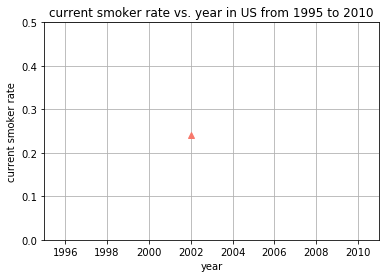

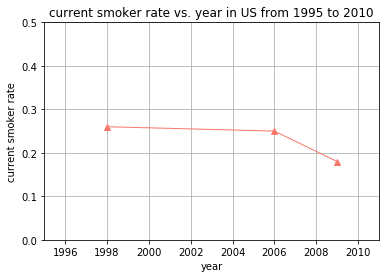

2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed


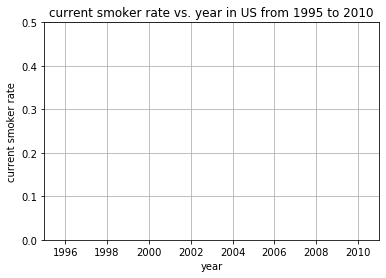

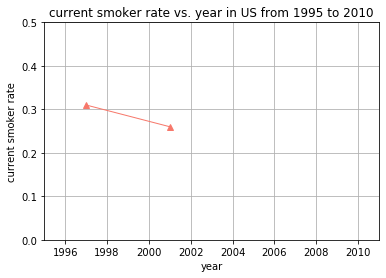

2 of 2 tests passed


In [9]:
###########
# Functions
from matplotlib import pyplot
@typecheck
def current_smoker_trend(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, returns the line chart showing 
    the trend of currrent smoker in US from 1995 to 2010
    """
    # Template from HtDAP, based on function composition 
    return plot_current_smoker_over_year(read(filename)) 
    
    

@typecheck
def read(filename: str) -> List[SmokeData]:
    """    
    reads information from the specified file and returns a list of SmokeData
    """
    #return []  #stub
    # Template from HtDAP
    # losd contains the result so far
    losd = [] # type: List[SmokeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            sd = SmokeData(parse_int(row[0]),row[1],parse_float(row[2]),parse_float(row[3]))
            losd.append(sd)
    
    return losd


@typecheck
def is_nationwide(sd:SmokeData)->bool:
    """
    returns True if the Smokedata is for Nationwide; False otherwise
    """
    #return True #stub
    #template from SmokeData
    return sd.state=='Nationwide (States and DC)' or sd.state== 'Nationwide (States, DC, and Territories)'

@typecheck
def filter_nation_data(losd:List[SmokeData])->List[SmokeData]:
    """
    takes a list of smoke data and filter out those for Nationwide (States and DC) 
    and Nationwide (States, DC, and Territories)
    """
    #return [] #stub
    #template from List[SmokeData]
    #list_without_nationwide is a list of SmokeData without nationwide seen so far
    list_without_nationwide=[] #type:List[SmokeData]
    for sd in losd:
        if is_nationwide(sd)==False:
            
            list_without_nationwide.append(sd)
    return list_without_nationwide
@typecheck
def calculate_current_smokers(sd:SmokeData)->float:
    """
    takes a Smokedata, returns the sum of the percentage of smoke everyday 
    and smoke some day
    """
    #return 0.0#stub
    #template from SmokeData
    return sd.percent_everyday+sd.percent_some_days


@typecheck
def get_curr_smoker_data(sd:SmokeData)->CurrentSmokerData:
    """
    takes a SmokeData and gets a CurrentSmokerData
    """
    #return CurrentSmokerData(2001,0.2) #stub
    #template from SmokeData, composition rule, and domain shift
    return CurrentSmokerData(sd.year,calculate_current_smokers(sd))

@typecheck
def get_curr_smoker_list(losd:List[SmokeData])->List[CurrentSmokerData]:
    """
    takes a list of smoke data and turns it into current smoker data
    """
    #return [] #stub
    #template based on List[SmokeData] and composition rule
    #locsd is a list of CurrentSmokerData seen so far
    locsd=[] #type:List[CurrentSmokerData]
    for sd in losd:
        locsd.append(get_curr_smoker_data(sd))
    return locsd
@typecheck
def is_given_year(csd:CurrentSmokerData,year:int)->bool:
    """
    returns True if the CurrentSmokerData is for the given year, False otherwise
    """
    #return True #stub
    #template from CurrentSmokerData and one additional parameter
    return csd.year==year

@typecheck
def filter_year(locsd:List[CurrentSmokerData],year:int)->List[CurrentSmokerData]:
    """
    takes a list of CurrentSmokerData and returns a list of CurrentSmokerData for the given year
    """
    #return [] #stub
    #locsd_for_given_year is list of CurrentSmokerData for the given year seen so far
    locsd_for_given_year=[] #type:List[CurrentSmokerData]
    for csd in locsd:
        if is_given_year(csd,year):
            locsd_for_given_year.append(csd)
    return locsd_for_given_year

@typecheck
def calculate_aver_for_given_year(locsd:List[CurrentSmokerData],year:int)->CurrentSmokerData:
    """
    takes a list of CurrentSmokerData, calculates their average, and returns a CurrentSmokerData 
    with a year and a average current smoker rate, return the average as 0 is the list is empty
    """
    #return CurrentSmokerData(2001,0.2) #stub
    #template from List[CurrentSmokerData], composition rule, and one additional parameter
    list_for_given_year=filter_year(locsd,year)
    if len(list_for_given_year)==0:
        return CurrentSmokerData(year,0)
    else:
        #curr_smoker_sum is the sum of current smoker for the given year seen so far
        curr_smoker_sum=0 #type:float
        for csd in list_for_given_year:
            curr_smoker_sum=curr_smoker_sum+csd.curr_smoker
        return CurrentSmokerData(year,curr_smoker_sum/len(list_for_given_year))
        
@typecheck
def get_smoker_data(locsd:List[CurrentSmokerData])->List[float]:
    """
    takes a list of CurrentSmokerData and returns a list of years as floats
    """
    #return [] #stub
    #template from List[CurrentSmokerData]
    #list_of_curr_smoker is a list of current smoker rate seen so far
    list_of_curr_smoker=[] #type:List[float]
    for csd in locsd:
        list_of_curr_smoker.append(csd.curr_smoker)
    return list_of_curr_smoker

@typecheck
def calculate_aver_for_years(locsd:List[CurrentSmokerData],loy:List[int])->List[CurrentSmokerData]:
    """
    takes a list of CurrentSmokerData and a list of year, returns a list of current smoker
    data based on the years given in the list
    """
    #return [] #stub
    #template from List[int], composition rule and one additional parameter
    #list_of_aver_for_years is a list of current smoker data for the years seen so far
    list_of_aver_for_years=[]
    for y in loy:
        list_of_aver_for_years.append(calculate_aver_for_given_year(locsd,y))
    return list_of_aver_for_years


@typecheck
def get_year(locsd:List[CurrentSmokerData])->List[int]:
    """
    takes a list of CurrentSmokerData and returns a list of years as integers
    """
    #return [] #stub
    #template from List[CurrentSmokerData]
    #list_of_year is a list of year seen so far
    list_of_year=[] #type:List[int]
    for csd in locsd:
        list_of_year.append(csd.year)
    return list_of_year


@typecheck
def plot_current_smoker_over_year(losd:List[SmokeData])->None:
    """
    takes a list of current smoker data and produces a line chart showing the current 
    smoker rate against year in the US from 1995 to 2010
    ASSUME the the list of year and the list of current smoker percentage have the same
    length
    """
    #return None #stub
    #template from visualization
    losd_no_nation=filter_nation_data(losd)
    locsd_no_nationwide=get_curr_smoker_list(losd_no_nation)
    locsd_no_nationwide_sorted=sorted(locsd_no_nationwide, key=lambda x: x.year)
    
    x_values=get_year(locsd_no_nationwide_sorted)
    y_values=get_smoker_data(calculate_aver_for_years(locsd_no_nationwide,x_values))
    
    pyplot.axis([1995,2011,0,0.5])
    pyplot.xlabel('year')
    pyplot.ylabel('current smoker rate')
    pyplot.title('current smoker rate vs. year in US from 1995 to 2010')
    
    line=pyplot.plot(x_values,y_values)
    
    pyplot.setp(line,color='#F7786B',linewidth=1.0,marker='^')
    pyplot.grid(True)
    pyplot.show()
    
    return None

start_testing()

# Examples and tests for main
expect(current_smoker_trend('testfile_1row.csv'),None)
expect(current_smoker_trend('testfile_3rows.csv'),None)

summary()

start_testing()

# Examples and tests for read


expect(read('testfile_1row.csv'),[SmokeData(2002,'Alabama',0.19,0.05)])
expect(read('testfile_3rows.csv'),[SmokeData(2009, 'Georgia',0.13,0.05), 
                               SmokeData(2006, 'Indiana',0.19,0.06), 
                               SmokeData(1998,'Louisiana',0.21,0.05)])


summary()



# Examples and tests for analyze 

start_testing()
expect(is_nationwide(SmokeData(2001,'Guam',0.27,0.05)),False)
expect(is_nationwide(SmokeData(1998,"Nationwide (States, DC, and Territories)",0.19,0.05)),True)                     
summary()


start_testing()
expect(filter_nation_data([SmokeData(2001,'Guam',0.27,0.05),
                          SmokeData(1998,"Nationwide (States, DC, and Territories)",0.19,0.05)]),
       [SmokeData(2001,'Guam',0.27,0.05)])
expect(filter_nation_data([SmokeData(1997,'Guam',0.27,0.04),
                          SmokeData(2000,'Nationwide (States, DC, and Territories)',0.27,0.05),
                          SmokeData(1998,'Nationwide (States and DC)',0.28,0.05),
                          SmokeData(2001,'Wisconsin',0.11,0.15)]),
       [SmokeData(1997,'Guam',0.27,0.04),SmokeData(2001,'Wisconsin',0.11,0.15)])
summary()


start_testing()
expect(calculate_current_smokers(SD1),0.42)
expect(calculate_current_smokers(SmokeData(1998,'Louisiana',0.21,0.05)),0.26)
summary()    


start_testing()
expect(get_curr_smoker_data(SmokeData(2001,'Alabama',0.09,0.11)),
       CurrentSmokerData(2001,0.2))
expect(get_curr_smoker_data(SmokeData(1998,'California',0.5,0.04)),
       CurrentSmokerData(1998,0.54))
summary()

start_testing()
expect(get_curr_smoker_list([]),[])
expect(get_curr_smoker_list([SmokeData(1997,'Guam',0.27,0.44),
                            SmokeData(2000,'Nationwide (States, DC, and Territories)',0.27,0.05),
                            SmokeData(1998,'Nationwide (States and DC)',0.28,0.05),
                            SmokeData(2001,'Wisconsin',0.11,0.15)]),
       [CurrentSmokerData(1997,0.27+0.44),
       CurrentSmokerData(2000,0.27+0.05),
       CurrentSmokerData(1998,0.28+0.05),
       CurrentSmokerData(2001,0.11+0.15)])
summary()

start_testing()
expect(is_given_year(C1,2010),False)
expect(is_given_year(CurrentSmokerData(1998,0.21),1998),True)
summary()

start_testing()
expect(filter_year([],2000),[])
expect(filter_year([CurrentSmokerData(1995,0.2),
                    CurrentSmokerData(1995,0.13),
                    CurrentSmokerData(1996,0.2)],1995),
       [CurrentSmokerData(1995,0.2),
        CurrentSmokerData(1995,0.13)])
summary()

start_testing()
expect(calculate_aver_for_given_year([],2001),CurrentSmokerData(2001,0))
expect(calculate_aver_for_given_year([CurrentSmokerData(1998,0.1),
                                     CurrentSmokerData(1997,0.2),
                                     CurrentSmokerData(1998,0.3)],1998),CurrentSmokerData(1998,0.2))
expect(calculate_aver_for_given_year([CurrentSmokerData(1993,0.1),
                                     CurrentSmokerData(1997,0.2),
                                     CurrentSmokerData(1999,0.3)],1998),CurrentSmokerData(1998,0))
summary()

start_testing()
expect(get_smoker_data([]),[])
expect(get_smoker_data([CurrentSmokerData(1998,0.3),
                        CurrentSmokerData(1996,0.1),
                        CurrentSmokerData(2001,0.5)]),[0.3, 0.1, 0.5])
summary() 

start_testing()
expect(calculate_aver_for_years([],[]),[])
expect(calculate_aver_for_years([CurrentSmokerData(1998,0.3),
                                 CurrentSmokerData(1996,0.1),
                                 CurrentSmokerData(1998,0.5),
                                 CurrentSmokerData(2001,0.7),
                                 CurrentSmokerData(2001,0.5)],[1996,1998,2001]),
      [CurrentSmokerData(1996,0.1),CurrentSmokerData(1998,0.4),CurrentSmokerData(2001,0.6)])
summary()

start_testing()
expect(get_year([]),[])
expect(get_year([CurrentSmokerData(1998,0.3),
                CurrentSmokerData(1996,0.1),
                CurrentSmokerData(2001,0.5)]),[1998,1996,2001])
summary()

start_testing()
#the first test will produce an empty graph with 'year' as x label, 'current smoker 
#percentage' as y label, 'current smoker rate vs. year in US from 1995 to 2010'
#as title. 
expect(plot_current_smoker_over_year([]),None)
#the second test will produce a line graph with a line connecting the points (1997,0.31)
#and (2001,0.26)
expect(plot_current_smoker_over_year([SmokeData(1997,'Guam',0.27,0.04),
                               SmokeData(2001,'Wisconsin',0.11,0.15)]),None)
summary()
        



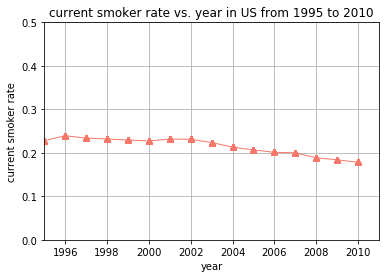

In [8]:
current_smoker_trend('tobacco.csv')